Project 2 - Data Mining : Aris Tsilifonis(sdi1700170) , Nizar Darwish(sdi1800286)

Υλοποιήθηκαν όλα τα ζητούμενα της εργασίας εκτός από το bonus

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import matplotlib 
import csv
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1.Preprocessing

In [ ]:
Real_news = csv.reader(open('/content/drive/MyDrive/News_dataset/True.csv', encoding="utf8"))
Fake_news = csv.reader(open('/content/drive/MyDrive/News_dataset/Fake.csv', encoding="utf8"))

True_data = {}
Fake_data = {}
# we make dictionary for true and fake news : key is the title and value is its text
# we also remove the unnecessary characters and also create lowercase characters
for true in Real_news:
  if true[0] == '' or true[1] == '' or true[2] == '' or true[3] == '' or true[1] == 'text':
    continue
  else:
    True_data[re.sub('[.]', '', true[0].lower())] = re.sub('[%,.’—!–$0-9\-\:\"\‘\’\(\)\“\”]', '', true[1].lower())

for fake in Fake_news:
  if fake[0] == '' or fake[1] == '' or fake[2] == '' or fake[3] == '' or fake[1] == 'text':
    continue
  else:
    Fake_data[fake[0]] = re.sub('[%,.’—!–$0-9\-\:\"\‘\’\(\)\“\”]', '', fake[1].lower())

In [ ]:
for i in range(0, 2):
  print(i,": ", list(True_data.values())[i], '\n')

for i in range(0, 2):
  print(i,": ", list(Fake_data.values())[i], '\n')

0 :  washington reuters  the head of a conservative republican faction in the us congress who voted this month for a huge expansion of the national debt to pay for tax cuts called himself a fiscal conservative on sunday and urged budget restraint in  in keeping with a sharp pivot under way among republicans us representative mark meadows speaking on cbs face the nation drew a hard line on federal spending which lawmakers are bracing to do battle over in january when they return from the holidays on wednesday lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues such as immigration policy even as the november congressional election campaigns approach in which republicans will seek to keep control of congress president donald trump and his republicans want a big budget increase in military spending while democrats also want proportional increases for nondefense discretionary spending on programs that support education scientific research infr

In [6]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [7]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
!pip install pattern
import pattern
from pattern.en import lemma, lexeme
nltk.download('punkt')
nltk.download('wordnet')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
Real_news = csv.reader(open('/content/drive/MyDrive/News_dataset/True.csv', encoding="utf8"))
Fake_news = csv.reader(open('/content/drive/MyDrive/News_dataset/Fake.csv', encoding="utf8"))

True_data_titles = []
True_data_text = []
Fake_data_titles = []
Fake_data_text = []
#Create a list of titles and a list of text for true and fake news
for true in Real_news:
  if true[0] == '' or true[1] == '' or true[2] == '' or true[3] == '' or true[1] == 'text':
    continue
  else:
    True_data_titles.append(re.sub('[%,.’—!–$0-9\-\:\'\"\‘\’\(\)\“\”\;\/\?\@\]\[]', '', true[0].lower()))
    True_data_text.append(re.sub('[%,.’—!–$0-9\-\:\'\"\‘\’\(\)\“\”\;\/\?\@\]\[]', '', true[1].lower()))

for fake in Fake_news:
  if fake[0] == '' or fake[1] == '' or fake[2] == '' or fake[3] == '' or fake[1] == 'text':
    continue
  else:
    Fake_data_titles.append(re.sub('[%,.’—!–$0-9\-\:\'\"\‘\’\(\)\“\”\;\/\?\@\]\[]', '', fake[0].lower()))
    Fake_data_text.append(re.sub('[%,.’—!–$0-9\-\:\'\"\‘\’\(\)\“\”\;\/\?\@\]\[]', '', fake[1].lower()))

In [ ]:
def remove_stopwords(data):
    output_array=[]
    for sentence in data:#for every sentence
        temp_list=[]
        for word in sentence.split():#split it to words
            if word.lower() not in stopwords:
                temp_list.append(word)#add it to the new list
                #print(word)
        output_array.append(' '.join(temp_list))#add it to output
    return output_array

after_True_data_titles = remove_stopwords(True_data_titles)
after_True_data_text = remove_stopwords(True_data_text)
after_Fake_data_titles = remove_stopwords(Fake_data_titles)
after_Fake_data_text = remove_stopwords(Fake_data_text)

Text = " ".join(true for true in after_True_data_titles)
print ("There are {} words in the combination of all titles in true data.".format(len(Text)))

Text2 = " ".join(fake for fake in after_True_data_text)
print ("There are {} words in the combination of all titles in fake data.".format(len(Text2)))

Text3 = " ".join(true for true in after_Fake_data_titles)
print ("There are {} words in the combination of all titles in true data.".format(len(Text3)))

Text4 = " ".join(fake for fake in after_Fake_data_text)
print ("There are {} words in the combination of all titles in fake data.".format(len(Text4)))

There are 1215157 words in the combination of all titles in true data.
There are 36849410 words in the combination of all titles in fake data.
There are 1775741 words in the combination of all titles in true data.
There are 40937342 words in the combination of all titles in fake data.


In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["say", "says","will","said","saying","still","even","one"])

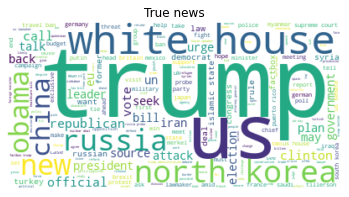

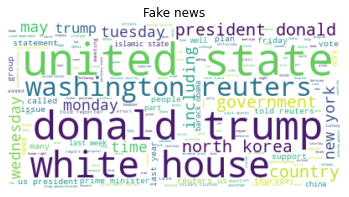

In [ ]:
# Generate a word cloud image
wordcloud_true_titles = WordCloud(stopwords=stopwords, background_color="white").generate(Text)
wordcloud_fake_titles = WordCloud(stopwords=stopwords, background_color="white").generate(Text2)
wordcloud_true_text = WordCloud(stopwords=stopwords, background_color="white").generate(Text3)
wordcloud_fake_text = WordCloud(stopwords=stopwords, background_color="white").generate(Text4)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud_true_titles, interpolation='bilinear')
plt.axis("off")
plt.title("True news")
plt.show()

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud_fake_titles, interpolation='bilinear')
plt.axis("off")
plt.title("Fake news")
plt.show()

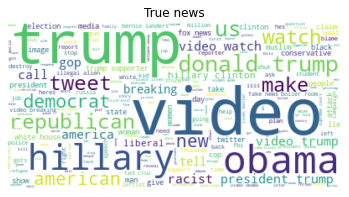

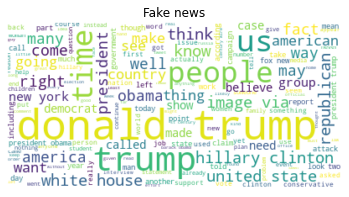

In [ ]:
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud_true_text, interpolation='bilinear')
plt.axis("off")
plt.title("True news")
plt.show()

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud_fake_text, interpolation='bilinear')
plt.axis("off")
plt.title("Fake news")
plt.show()

['video', 'trump', 'obama', 'hillary', 'donald trump', 'us', 'tweet', 'republican', 'watch', 'make', 'democrat', 'american', 'new', 'president trump', 'call', 'video watch', 'america', 'racist', 'gop', 'video trump', 'breaking', 'tell', 'hillary clinton', 'liberal', 'trump supporter', 'black', 'take', 'show', 'attack', 'give', 'muslim', 'media', 'cop', 'white house', 'conservative', 'clinton', 'people', 'president', 'fox news', 'image', 'lie', 'claim', 'want', 'man', 'women', 'day', 'election', 'state', 'twitter', 'woman', 'video breaking', 'back', 'hes', 'plan', 'vote', 'bernie sanders', 'gets', 'million', 'destroy', 'white', 'student', 'right', 'job', 'report', 'use', 'fbi', 'time', 'ted cruz', 'russia', 'illegal alien', 'left', 'campaign', 'speech', 'fake news', 'boiler room', 'detail', 'blame', 'police', 'threaten', 'ask', 'kid', 'gun', 'wow', 'going', 'need', 'heres', 'isis', 'help', 'reporter', 'think', 'shut', 'stop', 'support', 'leftist', 'president obama', 'bill', 'cnn', 'live

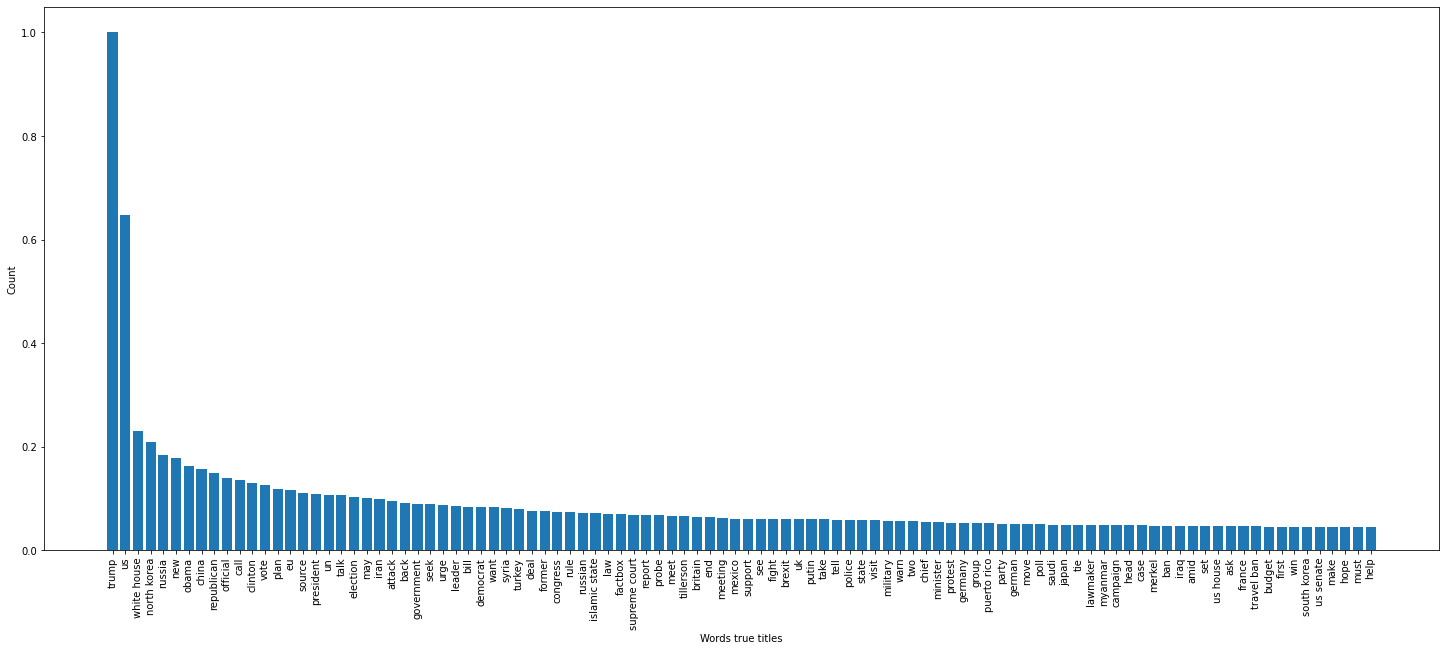

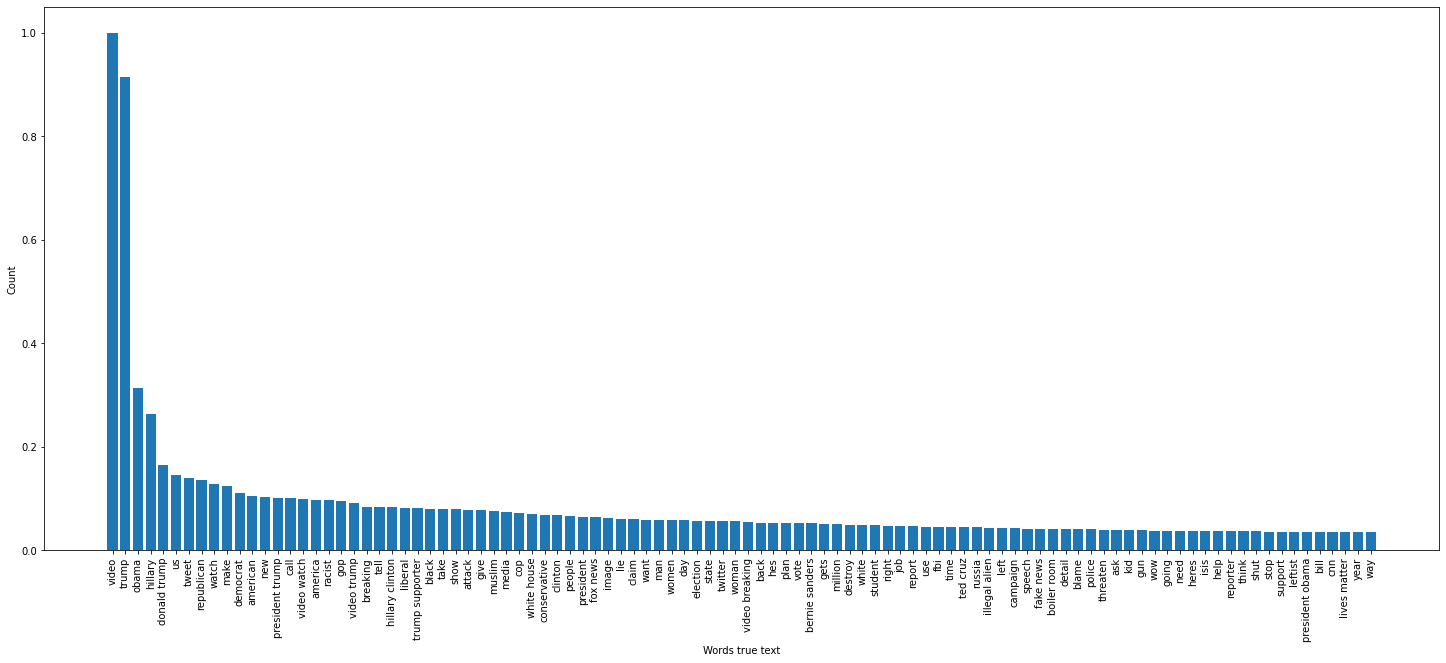

In [ ]:
#top 100 words
print(list(wordcloud_true_text.words_.keys())[:100])
plt.figure(figsize=(25,10))
plt.bar(list(wordcloud_true_titles.words_.keys())[:100],list(wordcloud_true_titles.words_.values())[:100])
plt.xticks(rotation=90)
plt.xlabel("Words true titles")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(25,10))
plt.bar(list(wordcloud_true_text.words_.keys())[:100],list(wordcloud_true_text.words_.values())[:100])
plt.xticks(rotation=90)
plt.xlabel("Words true text")
plt.ylabel("Count")
plt.show()

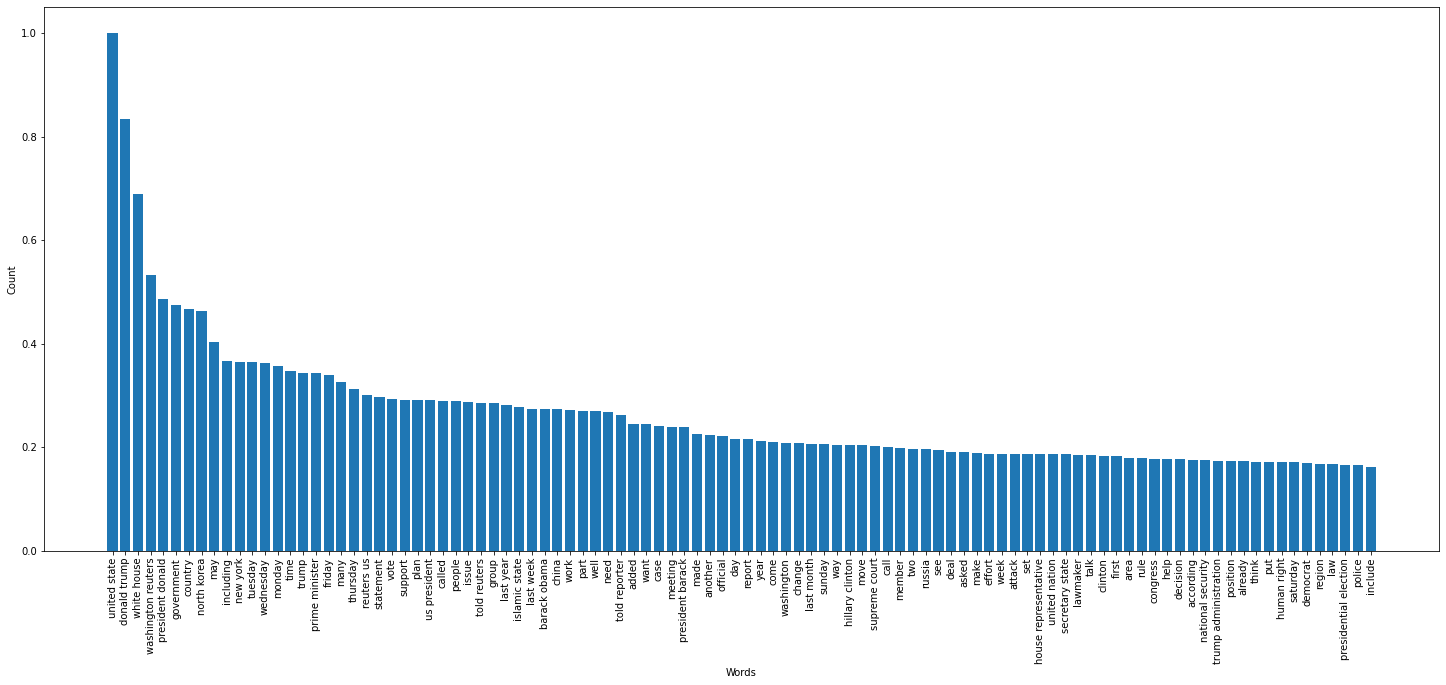

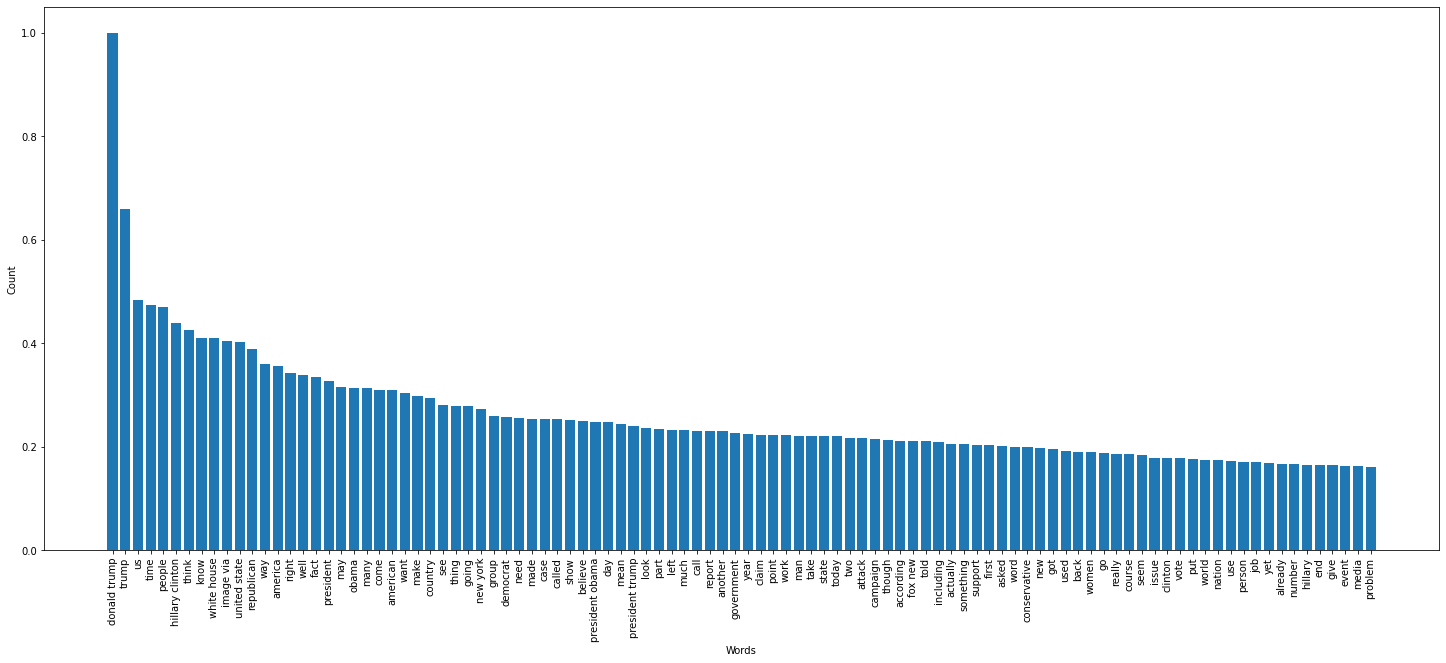

In [ ]:
plt.figure(figsize=(25,10))
plt.bar(list(wordcloud_fake_titles.words_.keys())[:100],list(wordcloud_fake_titles.words_.values())[:100])
plt.xticks(rotation=90)
plt.xlabel("Words")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(25,10))
plt.bar(list(wordcloud_fake_text.words_.keys())[:100],list(wordcloud_fake_text.words_.values())[:100])
plt.xticks(rotation=90)
plt.xlabel("Words")
plt.ylabel("Count")
plt.show()

In [ ]:
#with stopwords
text = " ".join(true for true in True_data_titles)
print ("There are {} words in the combination of all titles in true data.".format(len(text)))

text2 = " ".join(fake for fake in True_data_text)
print ("There are {} words in the combination of all titles in fake data.".format(len(text2)))

text3 = " ".join(true for true in Fake_data_titles)
print ("There are {} words in the combination of all titles in true data.".format(len(text)))

text4 = " ".join(fake for fake in Fake_data_text)
print ("There are {} words in the combination of all titles in fake data.".format(len(text2)))

# Generate a word cloud image
wordcloud_true_titles2 = WordCloud(background_color="white").generate(text)
wordcloud_fake_titles2 = WordCloud(background_color="white").generate(text2)
wordcloud_true_text2 = WordCloud(background_color="white").generate(text3)
wordcloud_fake_text2 = WordCloud(background_color="white").generate(text4)

There are 1367298 words in the combination of all titles in true data.
There are 49494980 words in the combination of all titles in fake data.
There are 1367298 words in the combination of all titles in true data.
There are 49494980 words in the combination of all titles in fake data.


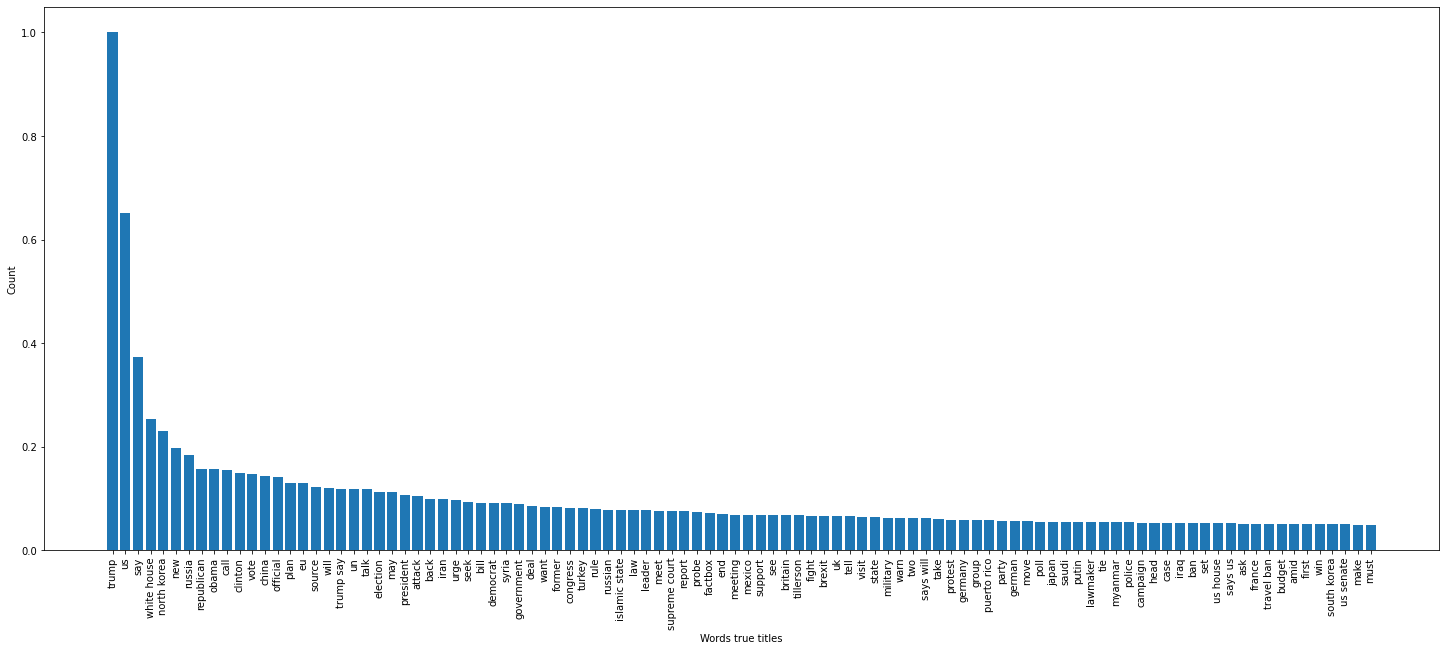

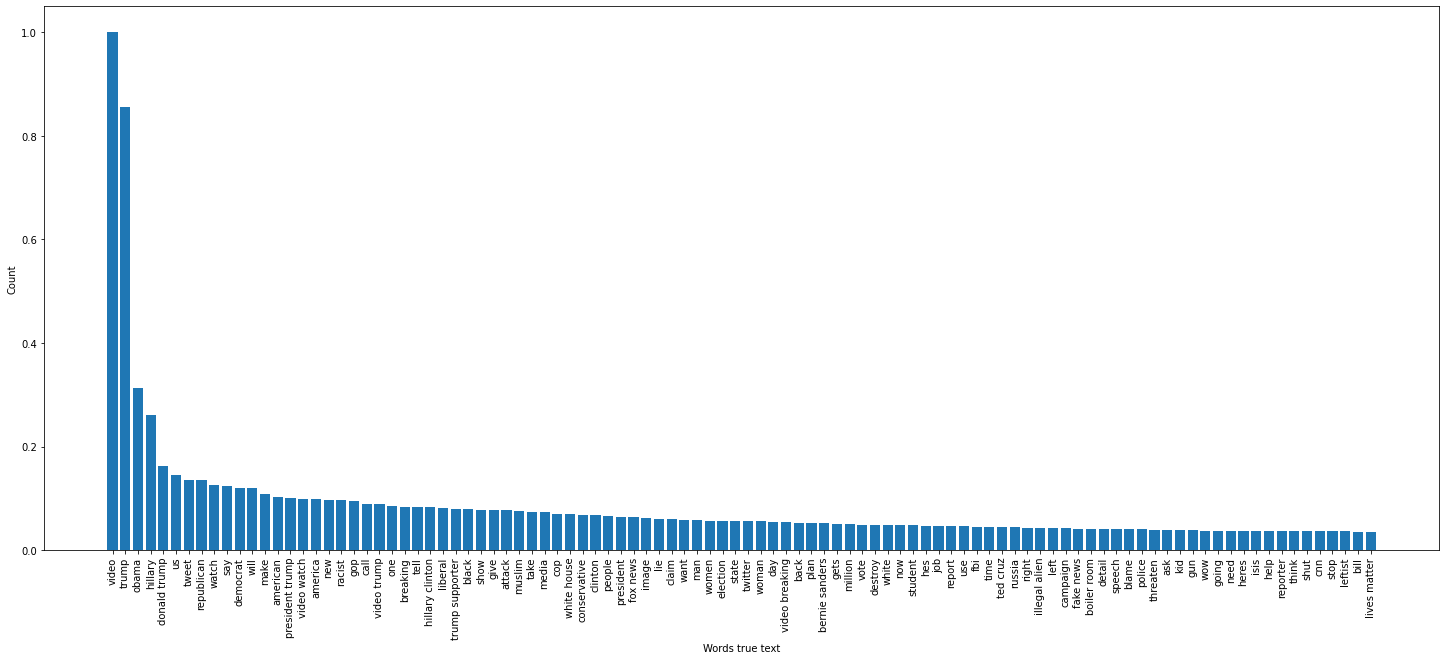

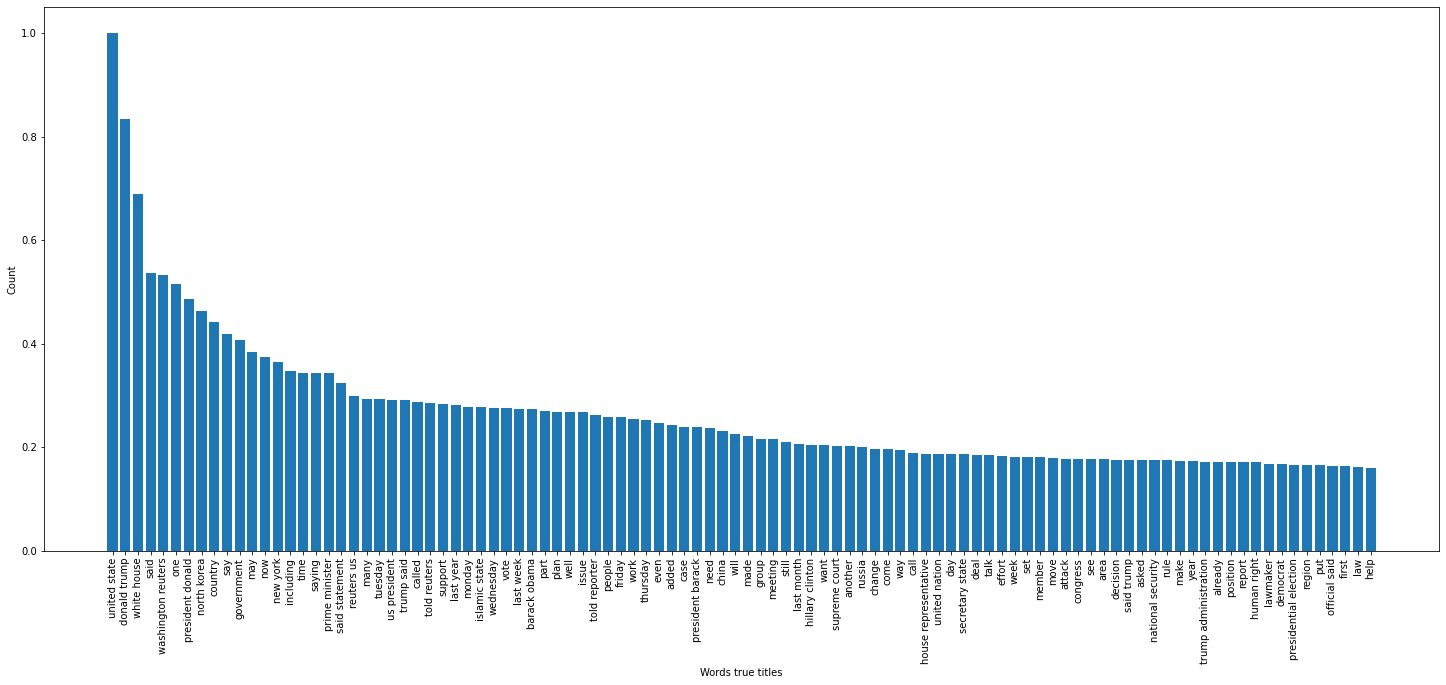

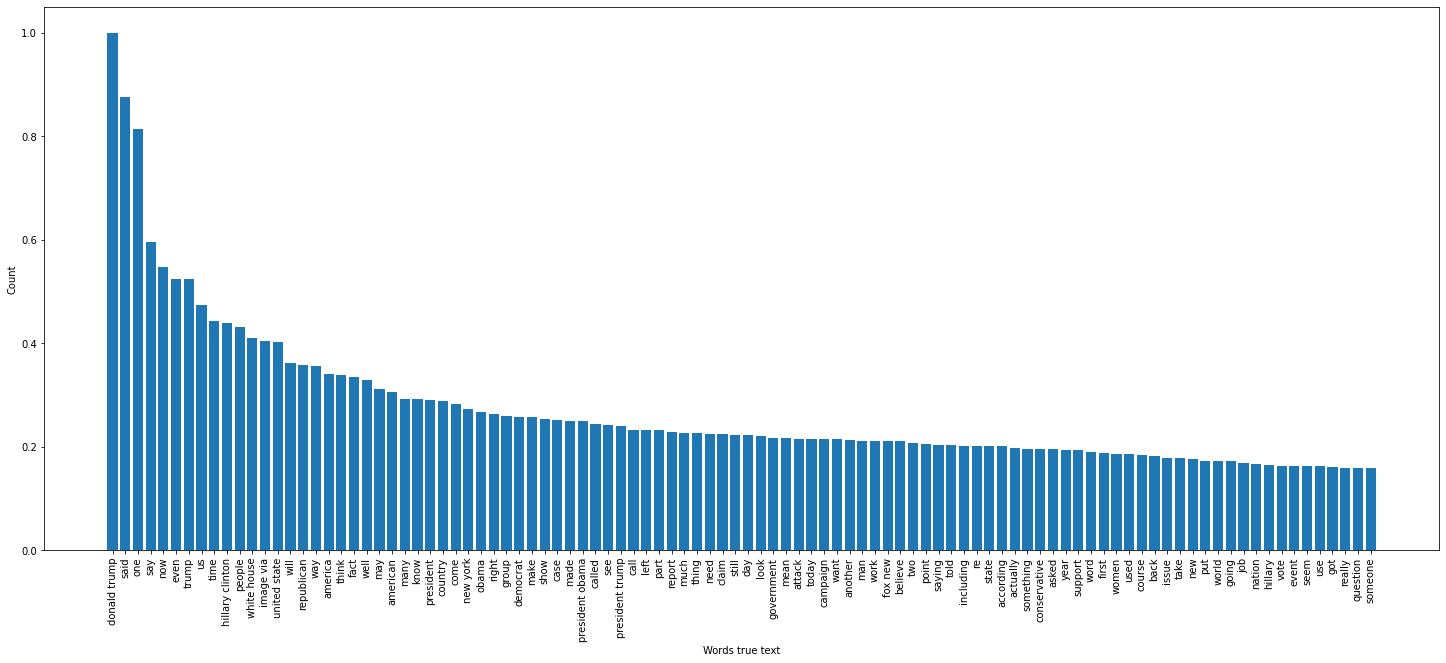

In [ ]:
plt.figure(figsize=(25,10))
plt.bar(list(wordcloud_true_titles2.words_.keys())[:100],list(wordcloud_true_titles2.words_.values())[:100])
plt.xticks(rotation=90)
plt.xlabel("Words true titles")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(25,10))
plt.bar(list(wordcloud_true_text2.words_.keys())[:100],list(wordcloud_true_text2.words_.values())[:100])
plt.xticks(rotation=90)
plt.xlabel("Words true text")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(25,10))
plt.bar(list(wordcloud_fake_titles2.words_.keys())[:100],list(wordcloud_fake_titles2.words_.values())[:100])
plt.xticks(rotation=90)
plt.xlabel("Words true titles")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(25,10))
plt.bar(list(wordcloud_fake_text2.words_.keys())[:100],list(wordcloud_fake_text2.words_.values())[:100])
plt.xticks(rotation=90)
plt.xlabel("Words true text")
plt.ylabel("Count")
plt.show()

In [ ]:
count = []
count2 = []
false_count = []
false_count2 = []
sum_of_chars = 0
fake_sum_of_chars = 0
sum_of_chars_text = 0
fake_sum_of_chars_text = 0
Real_news = csv.reader(open('/content/drive/MyDrive/News_dataset/True.csv', encoding="utf8"))
Fake_news = csv.reader(open('/content/drive/MyDrive/News_dataset/Fake.csv', encoding="utf8"))

for true in Real_news:#go line by line for every title
  if true[0] == '' or true[1] == '' or true[2] == '' or true[3] == '' or true[1] == 'text':
    continue
  else:#find average count of chars for all columns
    count.append((len(true[0])+len(true[1])+len(true[2])+len(true[3]))/4)
    sum_of_chars += (len(true[0])+len(true[1])+len(true[2])+len(true[3]))/4
    count2.append(len(true[1]))#and add counter only for text column
    sum_of_chars_text += len(true[1])
#same for false news
for false in Fake_news:
  if false[0] == '' or false[1] == '' or false[2] == '' or false[3] == '' or false[1] == 'text':
    continue
  else:
    false_count.append((len(false[0])+len(false[1])+len(false[2])+len(false[3]))/4)
    fake_sum_of_chars += (len(false[0])+len(false[1])+len(false[2])+len(false[3]))/4
    false_count2.append(len(false[1]))
    fake_sum_of_chars_text += len(false[1])

# plt.figure(figsize = (20, 5))

def createList(r1, r2):
    return [item for item in range(r1, r2+1)]
#create a simple list of idents to plot every value of list correctly
a = []
r1, r2 = 1, len(count)
a=createList(r1, r2)

b = []
r3, r4 = 1, len(false_count)
b=createList(r3, r4)
# creating the bar plot
# plt.bar(list(a),list(count))
# plt.show()

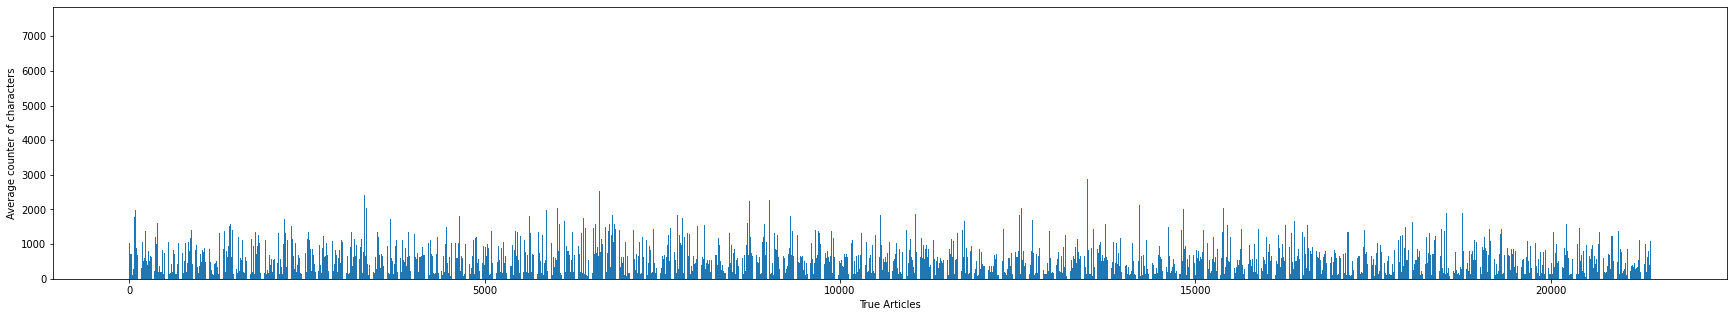

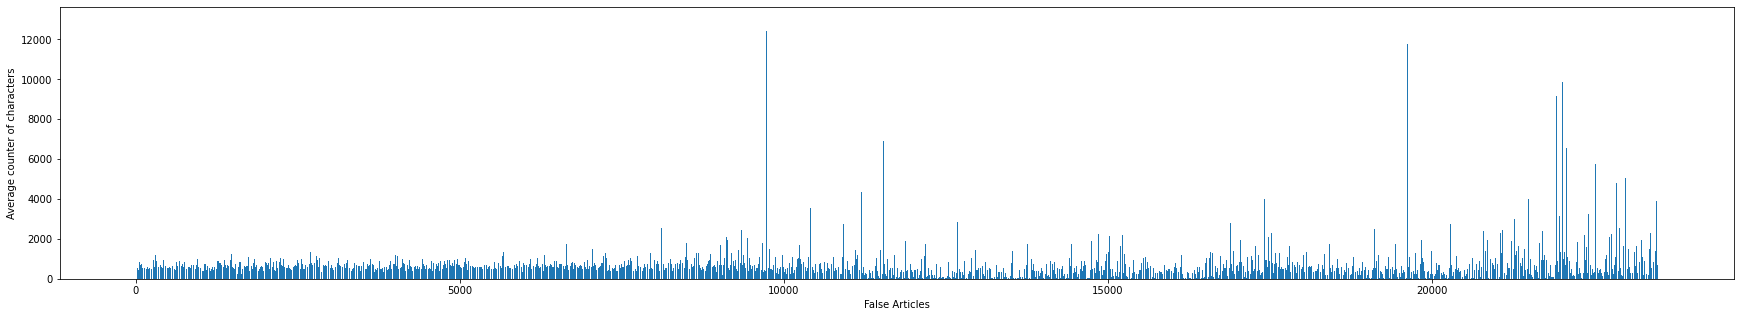

In [ ]:
# creating the bar plot
plt.figure(figsize = (30, 5))
plt.bar(a, count)
plt.xlabel("True Articles")
plt.ylabel("Average counter of characters")
plt.show()

# creating the bar plot
plt.figure(figsize = (30, 5))
plt.bar(b, false_count)
plt.xlabel("False Articles")
plt.ylabel("Average counter of characters")
plt.show()

In [ ]:
print("Average of characters in true new: ", sum_of_chars/len(count))
print("Average of characters in fake new: ", fake_sum_of_chars/len(false_count))

Average of characters in true new:  618.8108395200074
Average of characters in fake new:  665.4718602274179


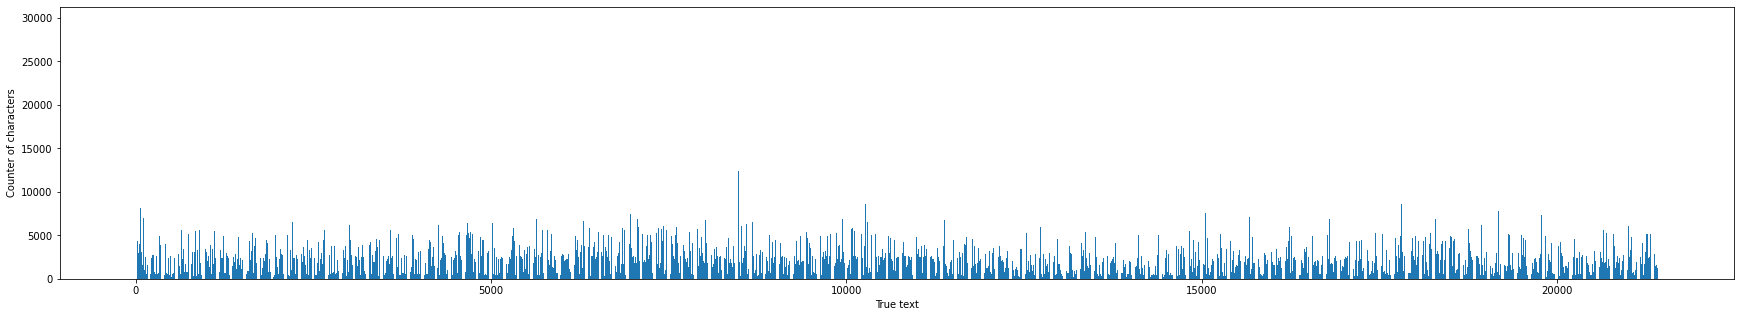

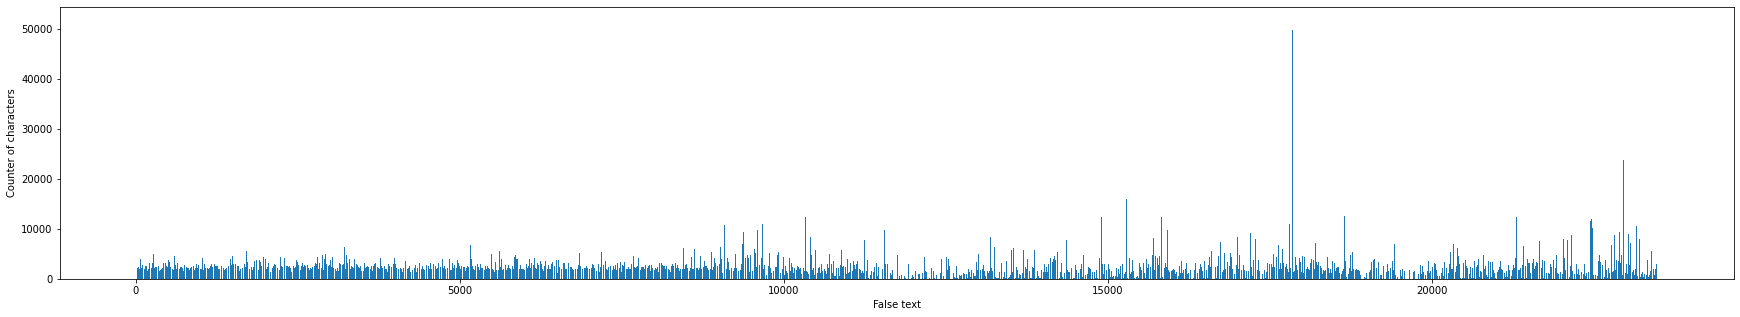

In [ ]:
# creating the bar plot
plt.figure(figsize = (30, 5))
plt.bar(a, count2)
plt.xlabel("True text")
plt.ylabel("Counter of characters")
plt.show()

# creating the bar plot
plt.figure(figsize = (30, 5))
plt.bar(b, false_count2)
plt.xlabel("False text")
plt.ylabel("Counter of characters")
plt.show()

In [ ]:
print("Average of characters of text in true new: ", sum_of_chars_text/len(count2))
print("Average of characters of text in fake new: ", fake_sum_of_chars_text/len(false_count2))

Average of characters of text in true new:  2383.278517065882
Average of characters of text in fake new:  2547.396235254035


In [ ]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
nltk_tokens = nltk.word_tokenize(Text)
nltk_tokens2 = nltk.word_tokenize(Text2)
nltk_tokens3 = nltk.word_tokenize(Text3)
nltk_tokens4 = nltk.word_tokenize(Text4)

finder = BigramCollocationFinder.from_words(nltk_tokens)
bigram_measures = BigramAssocMeasures()
finder2 = BigramCollocationFinder.from_words(nltk_tokens2)
bigram_measures2 = BigramAssocMeasures()
finder3 = BigramCollocationFinder.from_words(nltk_tokens3)
bigram_measures3 = BigramAssocMeasures()
finder4 = BigramCollocationFinder.from_words(nltk_tokens4)
bigram_measures4 = BigramAssocMeasures()

scored = finder.score_ngrams(bigram_measures.raw_freq)
sorted_by_second = sorted(scored, key=lambda tup: tup[1], reverse=True)

scored2 = finder2.score_ngrams(bigram_measures2.raw_freq)
sorted_by_second2 = sorted(scored2, key=lambda tup: tup[1], reverse=True)

scored3 = finder3.score_ngrams(bigram_measures3.raw_freq)
sorted_by_second3 = sorted(scored3, key=lambda tup: tup[1], reverse=True)

scored4 = finder4.score_ngrams(bigram_measures4.raw_freq)
sorted_by_second4 = sorted(scored4, key=lambda tup: tup[1], reverse=True)

In [ ]:
print(scored4[:10])

[(('donald', 'trump'), 0.00242197125898042), (('hillary', 'clinton'), 0.0012313800165139415), (('white', 'house'), 0.0011564168642104965), (('image', 'via'), 0.0011376760761346353), (('united', 'states'), 0.001133817678589605), (('new', 'york'), 0.0007696584436253209), (('president', 'obama'), 0.0007002072878147764), (('president', 'trump'), 0.0006722798389174145), (('fox', 'news'), 0.0005923558897703592), (('st', 'century'), 0.0004095413394224971)]


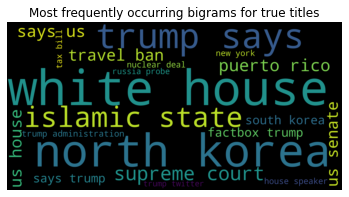

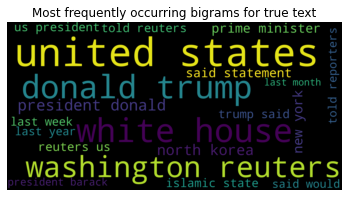

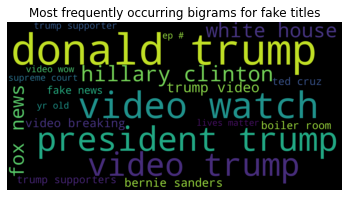

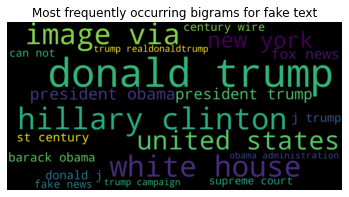

In [ ]:
worddict = {}
worddict2 = {}
worddict3 = {}
worddict4 = {}

listLen = len(sorted_by_second)
listLen2 = len(sorted_by_second2)
listLen3 = len(sorted_by_second3)
listLen4 = len(sorted_by_second4)
 
# Get the bigram and make a contiguous string for the dictionary key.
# Set the key to the scored value.
for i in range(listLen):
    worddict[' '.join(sorted_by_second[i][0])] = sorted_by_second[i][1]
for i in range(listLen2):
    worddict2[' '.join(sorted_by_second2[i][0])] = sorted_by_second2[i][1]
for i in range(listLen3):
    worddict3[' '.join(sorted_by_second3[i][0])] = sorted_by_second3[i][1]
for i in range(listLen4):
    worddict4[' '.join(sorted_by_second4[i][0])] = sorted_by_second4[i][1]
 
# -----
 
# Set word cloud params and instantiate the word cloud.
# The height and width only affect the output image file.
WC_height = 1500
WC_width = 3000
WC_max_words = 20
 
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width)
wordCloud.generate_from_frequencies(worddict)
plt.title('Most frequently occurring bigrams for true titles')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width)
wordCloud.generate_from_frequencies(worddict2)
plt.title('Most frequently occurring bigrams for true text')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width)
wordCloud.generate_from_frequencies(worddict3)
plt.title('Most frequently occurring bigrams for fake titles')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width)
wordCloud.generate_from_frequencies(worddict4)
plt.title('Most frequently occurring bigrams for fake text')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

train_path = '/content/drive/MyDrive/News_dataset/train.csv'
test_path = '/content/drive/MyDrive/News_dataset/test.csv'

df_true_news = pd.read_csv("/content/drive/MyDrive/News_dataset/True.csv")
df_fake_news = pd.read_csv("/content/drive/MyDrive/News_dataset/Fake.csv")
df_true_news['label'] = 1 #add new column to dataframes
df_fake_news['label'] = 0

df = pd.concat([df_true_news, df_fake_news]) #merge them to one df

df_train, df_test = train_test_split(df , test_size=0.2) 
df_train.to_csv(train_path)
df_test.to_csv(test_path)
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [9]:
import re
counter = 0

train =  csv.reader(open(train_path, encoding="utf8"))

train_text = []
label_train = []
counter = 0
counter2 = 0
flag=0
for row in train:
  if row[0] == '' or row[1] == '' or row[2] == '' or row[3] == '' or row[1] == 'text':
    continue
  else:
    #remove unnecessary chars and create lowercase
    u = re.sub('[%,.’—!–$0-9\-\:\'\"\‘\’\(\)\“\”\;\/\?\@\]\[]', '', row[1].lower())
    u = nltk.word_tokenize(u)#tokenize the text
    resultwords  = [word for word in u if word not in stopwords]#remove stopwords
    result = ' '.join(word for word in resultwords)#and join words to the sentence again
    train_text.append(result)#append list of sentences
    #print(row[5])
    label_train.append(row[5]) #cretae list of labels
  
new_list2 = []
for sentence in train_text:#lemmatize instruction, give meaning to the word
  new_list2.append(' '.join([lemma(wd) for wd in sentence.split()]))

In [10]:
test = csv.reader(open(test_path, encoding="utf8"))

test_text = []
label_test = []
counter=0
counter2=0
flag=0
for row in test:
  if row[0] == '' or row[1] == '' or row[2] == '' or row[3] == '' or row[1] == 'text':
    continue
  else:

    u = re.sub('[%,.’—!–$0-9\-\:\'\"\‘\’\(\)\“\”\;\/\?\@\]\[]', '', row[1].lower())
    u = nltk.word_tokenize(u)
    resultwords  = [word for word in u if word not in stopwords]
    #print(resultwords)
    result = ' '.join(word for word in resultwords)
    test_text.append(result)
    label_test.append(row[5])

new_list = []
for sentence in test_text:#lemmatize instruction, give meaning to the word
  new_list.append(' '.join([lemma(wd) for wd in sentence.split()]))

In [ ]:
print(test_text[:10])

['bundy case ruled mistrial federal case soon crumble', 'barack obama finds friend fundamental transformation america shocking way ryan betrayed americans trillion bill', 'deja vu hillary wants billion shovelready union jobs', 'breaking major action taking place trump tower activists project messages demonstrate images', 'wow kellyanne conways mistake forced leftist media expose really happened bowling green…and truth iraqi refugees pr nightmare left video', 'number new refugees myanmar bangladesh agencies', 'democratic lawmakers sue trump foreign state payments businesses', 'liberal hollywood implodes ratings trumpbashing emmys…insignificant celebrities dealt major blow', 'pocahontas calls trumps comments dem senator gillibrand slutshaming…so didnt call trumps comments romney campaign slutshaming video', 'catalan parliament votes start constituent process split spain']


In [ ]:
print(new_list[:10])

['bundy case rule mistrial federal case soon crumble', 'barack obama find friend fundamental transformation america shock way ryan betray american trillion bill', 'deja vu hillary want billion shovelready union job', 'break major action take place trump tower activist project message demonstrate image', 'wow kellyanne conway mistake force leftist media expose really happen bowl green…and truth iraqi refugee pr nightmare left video', 'number new refugee myanmar bangladesh agency', 'democratic lawmaker sue trump foreign state payment business', 'liberal hollywood implode rating trumpbash emmys…insignificant celebrity deal major blow', 'pocahonta call trump comment dem senator gillibrand slutshaming…so didnt call trump comment romney campaign slutshame video', 'catalan parliament vote start constituent process split spain']


In [ ]:
print(label_train)

['1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1',

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
bowX_train = count_vectorizer.fit_transform(train_text) #For training set
bowX_train2 = bowX_train.toarray()
bowX_test = count_vectorizer.transform(test_text)  #For testing set

In [16]:
bowX_test2 = bowX_test.toarray()

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidfX_train = tfidf_vectorizer.fit_transform(train_text)  #For the training set 
tfidfX_test = tfidf_vectorizer.transform(test_text)  #For the testing set

In [19]:
from sklearn import preprocessing
   
le = preprocessing.LabelEncoder()
le.fit(label_train)
label_train = le.transform(label_train)
label_test = le.transform(label_test)

print(label_train)
print(label_test)

[1 0 1 ... 1 0 0]
[0 1 0 ... 0 0 1]


In [20]:
!pip install gensim==3.8.3
!pip install word2vec

In [21]:
import os
import gensim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import LabelEncoder
# Feed a word2vec with the ingredients
w2vmodel2 = gensim.models.Word2Vec(new_list2,size=350, window=10, min_count=2,iter=20)
w2vmodel2.train(new_list2, total_examples=w2vmodel2.corpus_count, epochs=5); # train the model
def document_vector2(doc):
    """Create document vectors by averaging word vectors. Remove out-of-vocabulary words."""
    doc = [word for word in doc if word in w2vmodel2.wv.vocab]
    return np.mean(w2vmodel2[doc], axis=0)

In [22]:
#  word2vec with the test set
w2vmodel = gensim.models.Word2Vec(new_list,size=350,window=10, min_count=2,iter=20)
def document_vector(doc):
    """Create document vectors by averaging word vectors. Remove out-of-vocabulary words."""
    doc = [word for word in doc if word in w2vmodel.wv.vocab]
    return np.mean(w2vmodel[doc], axis=0)


In [27]:
df_train["position"] = df_train.text.apply(document_vector2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
# print(df.text[0])
# x=[word for word in df.text[0]]
# print(x)
df_test["position"] = df_test.text.apply(document_vector)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [29]:
print(df_test["position"])

8912     [-0.1660703, -0.0032749053, 0.058299214, 0.055...
7913     [-0.16995025, 0.0012978732, 0.06023348, 0.0570...
1697     [-0.16752821, -0.0037418902, 0.059815682, 0.05...
6350     [-0.18563849, -9.601497e-05, 0.06079076, 0.065...
15707    [-0.16498809, -0.0017415774, 0.060416106, 0.05...
                               ...                        
1338     [-0.1726989, -0.0041625267, 0.062597916, 0.058...
18128    [-0.15873997, -0.00088742, 0.06492593, 0.05268...
22421    [-0.17643623, -0.0015967936, 0.062597744, 0.06...
3314     [-0.16940965, -0.0020787504, 0.05469437, 0.058...
21129    [-0.18042393, 0.0009691007, 0.05960863, 0.0642...
Name: position, Length: 8980, dtype: object


In [30]:
print(df_train["position"])

7502     [-0.053783283, -0.0016961773, 0.0949834, 0.085...
18213    [-0.053918783, -0.0060781394, 0.09008121, 0.08...
15656    [-0.05431727, 0.0031448675, 0.09707317, 0.0898...
18815    [-0.049950857, 0.0045034382, 0.09119645, 0.082...
16930    [-0.061814047, 0.0012005419, 0.09448439, 0.092...
                               ...                        
2401     [-0.04728431, -0.003124209, 0.09478075, 0.0818...
15036    [-0.05828653, -0.010130795, 0.09163514, 0.0877...
16241    [-0.056355387, 0.004063875, 0.09577954, 0.0857...
1787     [-0.055408336, -0.0018640549, 0.09087327, 0.08...
7234     [-0.054779224, -0.0004402906, 0.098411955, 0.0...
Name: position, Length: 35918, dtype: object


In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

models = [MultinomialNB(),LogisticRegression(random_state=0, max_iter=1000),RandomForestClassifier(max_depth=2, random_state=0),SVC(C=0.1, kernel='linear', gamma=0.001)]
names = ["MNB","LR","RF","SVC"]

global avg_f1
global avf_a

def getScores(estimator, x, y):
    yPred = estimator.predict(x)
    return (accuracy_score(y, yPred), 
            precision_score(y, yPred, pos_label=1, average='macro'), 
            recall_score(y, yPred, pos_label=1, average='macro'))

def my_scorer(estimator, x, y):
    global avg_f1
    global avg_a
    a, p, r = getScores(estimator, x, y)
    F1 = 2 * (p * r) / (p + r)
    print(a, p, r, F1)
    avg_f1=avg_f1+F1
    avg_a=avg_a+a
    return a

for model, name in zip(models, names):
    if(name == "MNB"):
      model.fit(bowX_train2,label_train)
    else:
      model.fit(bowX_train,label_train)
    avg_f1=0
    avg_a=0
    print(name)
    start = time.time()
    if(name == "MNB"):
      sklearn.model_selection.cross_val_score(model,bowX_test2,label_test,scoring=my_scorer, cv=3).mean()
    else:
      sklearn.model_selection.cross_val_score(model,bowX_test,label_test,scoring=my_scorer, cv=3).mean()
    print('time', time.time() - start, '\n\n')
    print("Average F1 : ",avg_f1/3,'\n')
    print("Average accuracy : ",avg_a/3,'\n')

MNB
0.9231796927187709 0.9243755229411829 0.9223613389516121 0.9233673325394648
0.9124624122953559 0.9129541400360354 0.9118981518736085 0.9124258404202303
0.9234881389909789 0.9237508204589555 0.9230961455760089 0.9234233669820959
time 7.201153755187988 


Average F1 :  0.9197388466472637 

Average accuracy :  0.9197100813350353 

LR
0.9235136940547762 0.9237797816292785 0.9242108677238465 0.9239952743962159
0.9081189442031407 0.9093844663684831 0.90926477294064 0.9093246157157822
0.9097895088539927 0.9123627383310774 0.9112895078235572 0.9118258072759565
time 1.3106021881103516 


Average F1 :  0.9150485657959848 

Average accuracy :  0.9138073823706364 

RF
0.551436205744823 0.7629777975572368 0.5356382750597747 0.6294086759127806
0.5452723020380889 0.744376002278075 0.5291578373255367 0.6185817498891027
0.5583027063147343 0.7510179950196552 0.5429897781008349 0.6302822949541667
time 0.8686115741729736 


Average F1 :  0.6260909069186833 

Average accuracy :  0.5516704046992154 

SV

In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score
import sklearn
from sklearn.naive_bayes import GaussianNB


models = [MultinomialNB(),LogisticRegression(random_state=0, max_iter=1000),RandomForestClassifier(max_depth=2, random_state=0),SVC(C=0.1, kernel='linear', gamma=0.001)]
names = ["MNB","LR","RF","SVC"]

global avg_f1
global avf_a

def getScores(estimator, x, y):
    yPred = estimator.predict(x)
    return (accuracy_score(y, yPred), 
            precision_score(y, yPred, pos_label=1, average='macro'), 
            recall_score(y, yPred, pos_label=1, average='macro'))

def my_scorer(estimator, x, y):
    global avg_f1
    global avg_a
    a, p, r = getScores(estimator, x, y)
    F1 = 2 * (p * r) / (p + r)
    print(a, p, r, F1)
    avg_f1=avg_f1+F1
    avg_a=avg_a+a
    return a

for model, name in zip(models, names):
    model.fit(tfidfX_train,label_train)
    avg_f1=0
    avg_a=0
    print(name)
    start = time.time()
    sklearn.model_selection.cross_val_score(model,tfidfX_test,label_test,scoring=my_scorer, cv=3).mean()
    print('time', time.time() - start, '\n\n')
    print("Average F1 : ",avg_f1/3,'\n')
    print("Average accuracy : ",avg_a/3,'\n')

MNB
0.9208416833667334 0.9224739000955218 0.91987251653854 0.9211713717470055
0.908453057133311 0.909329223736914 0.9076998560482105 0.90851380934865
0.9181423321082526 0.9188208462219384 0.9175184915970858 0.9181692070864891
time 0.036097049713134766 


Average F1 :  0.9159514627273815 

Average accuracy :  0.9158123575360989 

LR
0.9188376753507014 0.9186987204079545 0.9188231099960329 0.9187609109917663
0.9107918476445038 0.910663680021721 0.9111120052216053 0.9108877874569449
0.9117941864350151 0.9124759953281927 0.9126869388036095 0.9125814548759894
time 0.5273745059967041 


Average F1 :  0.9140767177749002 

Average accuracy :  0.9138079031434067 

RF
0.5794923179692719 0.7705403522404006 0.5647067022633944 0.651758488898152
0.5609756097560976 0.7595342881678219 0.5453977897588584 0.6348963735660013
0.5689943200801871 0.7664291387222026 0.5539870592348015 0.6431181703610099
time 0.9018781185150146 


Average F1 :  0.6432576776083878 

Average accuracy :  0.5698207492685189 

SVC

In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score
import sklearn
from sklearn.naive_bayes import GaussianNB


models = [GaussianNB(),LogisticRegression(random_state=0, max_iter=1000),RandomForestClassifier(max_depth=2, random_state=0),SVC(C=0.1, kernel='linear', gamma=0.001)]
names = ["GNB","LR","RF","SVC"]

global avg_f1
global avf_a

def getScores(estimator, x, y):
    yPred = estimator.predict(x)
    return (accuracy_score(y, yPred), 
            precision_score(y, yPred, pos_label=1, average='macro'), 
            recall_score(y, yPred, pos_label=1, average='macro'))

def my_scorer(estimator, x, y):
    global avg_f1
    global avg_a
    a, p, r = getScores(estimator, x, y)
    F1 = 2 * (p * r) / (p + r)
    print(a, p, r, F1)
    avg_f1=avg_f1+F1
    avg_a=avg_a+a
    return a

for model, name in zip(models, names):
    model.fit(list(df_train["position"]),label_train)
    avg_f1=0
    avg_a=0
    print(name)
    start = time.time()
    sklearn.model_selection.cross_val_score(model,list(df_test["position"]),label_test,scoring=my_scorer, cv=3).mean()
    print('time', time.time() - start, '\n\n')
    print("Average F1 : ",avg_f1/3,'\n')
    print("Average accuracy : ",avg_a/3,'\n')

GNB
0.5247160988643954 0.6785948508751347 0.5397822917001726 0.6012809514253943
0.5278984296692282 0.670775777274088 0.5428448807703656 0.600067565469315
0.5238890745071835 0.6623993090110221 0.5386635982193707 0.5941577133086121
time 0.1496124267578125 


Average F1 :  0.5985020767344404 

Average accuracy :  0.5255012010136024 

LR
0.7712090848363393 0.7709683907981754 0.7708179205935647 0.7708931483533212
0.7798195790177079 0.7796240831869141 0.7798923490965013 0.779758193068338
0.7771466755763448 0.7770170095519642 0.7773102538174542 0.7771636040225168
time 0.6551346778869629 


Average F1 :  0.7759383151480587 

Average accuracy :  0.7760584464767973 

RF
0.7668670674682698 0.7666465798917992 0.7668695787363162 0.7667580631001807
0.778149014366856 0.7794096858123463 0.7792213191706231 0.7793154911090628
0.7801536919478784 0.7814874207814382 0.7812349963924287 0.7813611882000522
time 6.093257904052734 


Average F1 :  0.7758115808030986 

Average accuracy :  0.7750565912610013 

SV

Υλοποιήσαμε τους αλγορίθμους classification με τα train και test dataset.Το πρώτο dataset αποτελείται από το bag-of-words , το δεύτερο από το tf-idf και το τρίτο από το word2vec.Για την αξιολόγηση των αλγορίθμων χρησιμοποιήθηκαν τα f1,accuracy scores.Χρησιμοποιήσαμε cross validation με τιμή 3 για καλύτερο accuracy και πέρνουμε το average των τιμών τους για το τελικό αποτέλεσμα.Θεωρήσαμε ότι είναι καλή τιμή για να πέρνουμε σε εύλογο χρόνο αξιόλογα αποτελέσματα σε ακρίβεια.Για το BoW , εκτός από random forest που έχει απόδοση 60%, οι άλλοι αλγόριθμοι έχουν ικανοποιητικό ποσοστό (κοντά στο 90%).Το ίδιο και για το tf-idf.Για το word2vec έχουμε καλά ποσοστά απόδοσης (κοντά στο 75%) , εκτός από τον Gaussian Naive Bayes που έχουμε γύρω στο 60%. Ξέρουμε από θεωρία ότι η Gaussian Naive Bayes βγάζει χειρότερα αποτελέσματα από τους άλλους αλγορίθμους.Επισης βγαλαμε τα stopwords, τα συμβολα και καναμε lemmatize τα data επειδη παρατηρησαμε μεγαλη αλλαγή στον χρονο εκτελεσης των αλγορίθμων, αλλα και στα αποτελεσματα.
